In [1]:
#@title **Librerias** { display-mode: "form" }
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from keras.backend import dropout
from keras.models import Model, load_model, Sequential
from tensorflow.keras.models import Model
from keras.layers import Input,GRU,Dropout,Dense,Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from keras.callbacks import ModelCheckpoint, EarlyStopping
from matplotlib import gridspec 

!pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joseisaacleal","key":"73a54abfc609f81d789f018c67ad0661"}'}

In [3]:
#@title **Descargar dataset** { display-mode: "form" }
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d himanshunakrani/cryptocurrencies-dataset
!unzip cryptocurrencies-dataset.zip

  0% 0.00/77.0k [00:00<?, ?B/s]
100% 77.0k/77.0k [00:00<00:00, 83.8MB/s]
Archive:  cryptocurrencies-dataset.zip
  inflating: crypto_data_updated_27_august.csv  


In [4]:
#@title **Preparar Dataframe** { display-mode: "form" }
df = pd.read_csv('crypto_data_updated_27_august.csv')
target = 'Adj Close (BTC)'
X = df.loc[:,df.columns!=target]
Y = df.loc[:,df.columns==target]

X = X.drop(['Date','Volume (BNB)','Volume (BTC)','Volume (USDT)','Volume (ETH)'],axis=1)
print(X.shape)
X

(1753, 3)


,Adj Close (BNB),Adj Close (USDT),Adj Close (ETH)
0,1.99077,1.00818,320.884003
1,1.79684,1.00601,299.252991
2,1.67047,1.00899,314.681000
3,1.51969,1.01247,307.907990
4,1.68662,1.00935,316.716003
...,...,...,...
1748,299.03000,1.00000,1662.770000
1749,296.45000,1.00000,1657.060000
1750,301.58000,1.00010,1696.460000
1751,279.60000,1.00000,1507.780000


In [5]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 20)

In [7]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (1227, 3)
x_test shape:  (526, 3)
y_train shape:  (1227, 1)
y_test shape:  (526, 1)


In [8]:
#@title **Random Forest** { display-mode: "form" }
rndforest = RandomForestRegressor(n_estimators=300)
rndforest.fit(x_train, y_train.ravel())

Y_rndf = rndforest.predict(X)

print("TRAINING ACCURACY:", rndforest.score(x_train, y_train))
print("VALIDATION ACCURACY:", rndforest.score(x_test, y_test))

TRAINING ACCURACY: 0.9952619039348054
VALIDATION ACCURACY: 0.9657646367006294


In [9]:
#@title **SVR (rbf)** { display-mode: "form" }
est = SVR(kernel='rbf')
est.fit(x_train,y_train.ravel())

Y_rbf = est.predict(X)

print("TRAINING ACCURACY:", est.score(x_train, y_train))
print("VALIDATION ACCURACY:", est.score(x_test, y_test))

TRAINING ACCURACY: 0.9170323811294818
VALIDATION ACCURACY: 0.9249098102981248


In [10]:
#@title **SVR (poly)** { display-mode: "form" }
est2 = SVR(kernel='poly')
est2.fit(x_train,y_train.ravel())

Y_poly = est2.predict(X)

print("TRAINING ACCURACY:", est2.score(x_train, y_train))
print("VALIDATION ACCURACY:", est2.score(x_test, y_test))

TRAINING ACCURACY: 0.8895269208830948
VALIDATION ACCURACY: 0.8899125255848319


In [11]:
#@title **SVR (linear)** { display-mode: "form" }
est3 = SVR(kernel='linear')
est3.fit(x_train,y_train.ravel())

Y_linear = est3.predict(X) 

print("TRAINING ACCURACY:", est3.score(x_train, y_train))
print("VALIDATION ACCURACY:", est3.score(x_test, y_test))

TRAINING ACCURACY: 0.8487881995414908
VALIDATION ACCURACY: 0.866432604752901


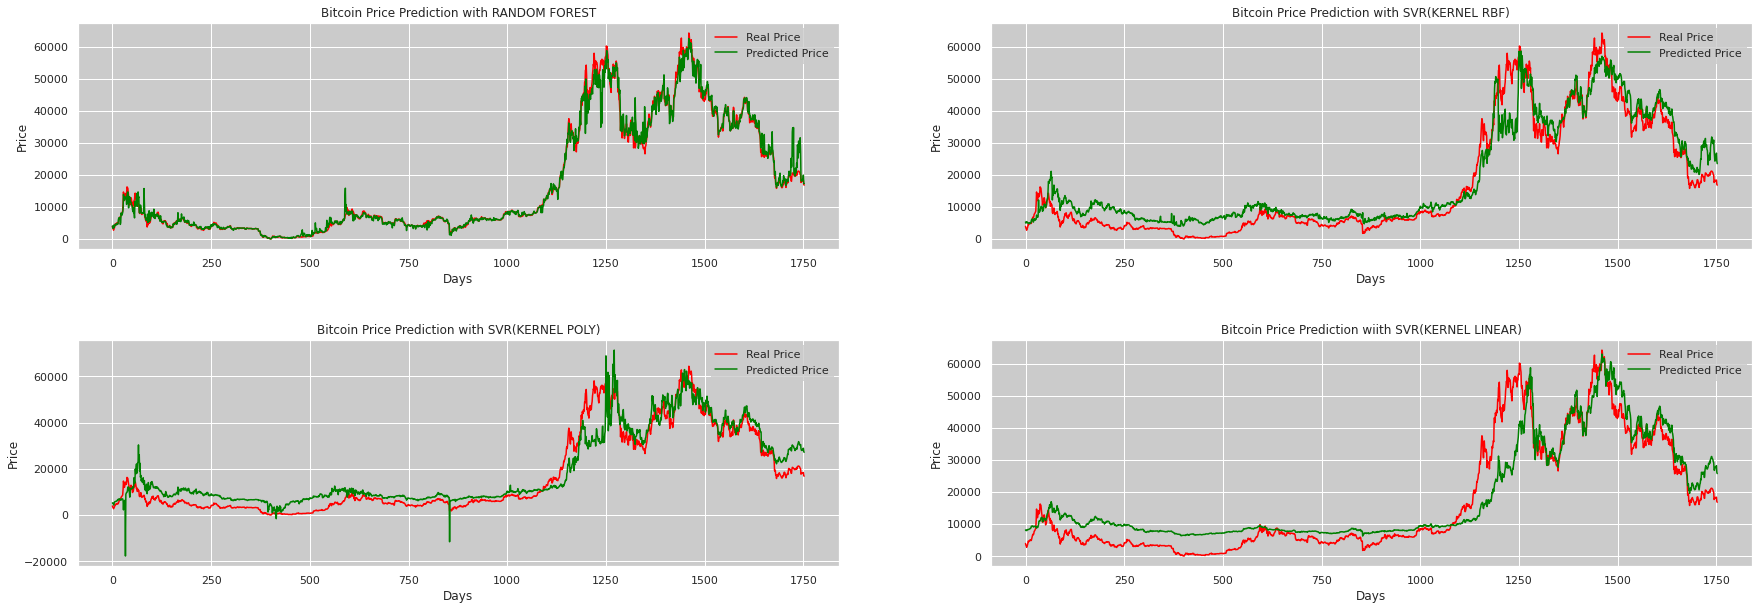

In [12]:
#@title **Graficas de resultados** { display-mode: "form" }
scale = 1/1.55448308e-05
Y = Y*scale
Y_rndf = Y_rndf*scale

plt.rcParams['axes.facecolor'] = 'cbcbcb'

plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
plt.plot(Y, color = 'red', label = 'Real Price')
plt.plot(Y_rndf, color = 'green', label = 'Predicted Price')
plt.title('Bitcoin Price Prediction with RANDOM FOREST')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

Y_rbf = Y_rbf*scale
plt.subplot(2, 2, 2)
plt.plot(Y, color = 'red', label = 'Real Price')
plt.plot(Y_rbf, color = 'green', label = 'Predicted Price')
plt.title('Bitcoin Price Prediction with SVR(KERNEL RBF)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

Y_poly = Y_poly*scale
plt.subplot(2, 2, 3)
plt.plot(Y, color = 'red', label = 'Real Price')
plt.plot(Y_poly, color = 'green', label = 'Predicted Price')
plt.title('Bitcoin Price Prediction with SVR(KERNEL POLY)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

Y_linear = Y_linear*scale
plt.subplot(2, 2, 4)
plt.plot(Y, color = 'red', label = 'Real Price')
plt.plot(Y_linear, color = 'green', label = 'Predicted Price')
plt.title('Bitcoin Price Prediction wiith SVR(KERNEL LINEAR)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

plt.subplots_adjust(hspace=0.4)

plt.show()

In [13]:
#@title **RNN** { display-mode: "form" }
Y=Y/scale
X_train = [] 
Y_train = []

for i in range(60, X.shape[0]):
    X_train.append(X[i-60:i])
    Y_train.append(Y[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

x_tr, x_te, y_tr, y_te = train_test_split(X_train,Y_train, test_size=0.20, random_state = 42)

model = Sequential() 
model.add(Bidirectional(GRU(units = 70, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 3))))
model.add(Dropout(0.3))
model.add(GRU(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(GRU(units = 110, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=50)
model.compile(optimizer='adam', loss='mse',metrics=['mse'])

history= model.fit(x_tr, y_tr,
                   epochs = 50, 
                   batch_size=256, 
                   validation_split=0.1)

X_val = [] 
Y_val = []

for i in range(60, X.shape[0]):
    X_val.append(X[i-60:i])
    Y_val.append(Y[i,0])

X_val, Y_val = np.array(X_val), np.array(Y_val)

prediction = model.predict(X_val)

Y_val = Y_val*scale
prediction = prediction*scale

Epoch 1/50
5/5 [==============================] - 14s 1s/step - loss: 0.1114 - mse: 0.1114 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 2/50
5/5 [==============================] - 5s 928ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 3/50
5/5 [==============================] - 5s 889ms/step - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 4/50
5/5 [==============================] - 4s 705ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 5/50
5/5 [==============================] - 2s 408ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 6/50
5/5 [==============================] - 2s 408ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 7/50
5/5 [==============================] - 2s 410ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 8/50
5/5 [==============================] - 2s 408ms/step - loss: 0.0150 - mse: 0.0150

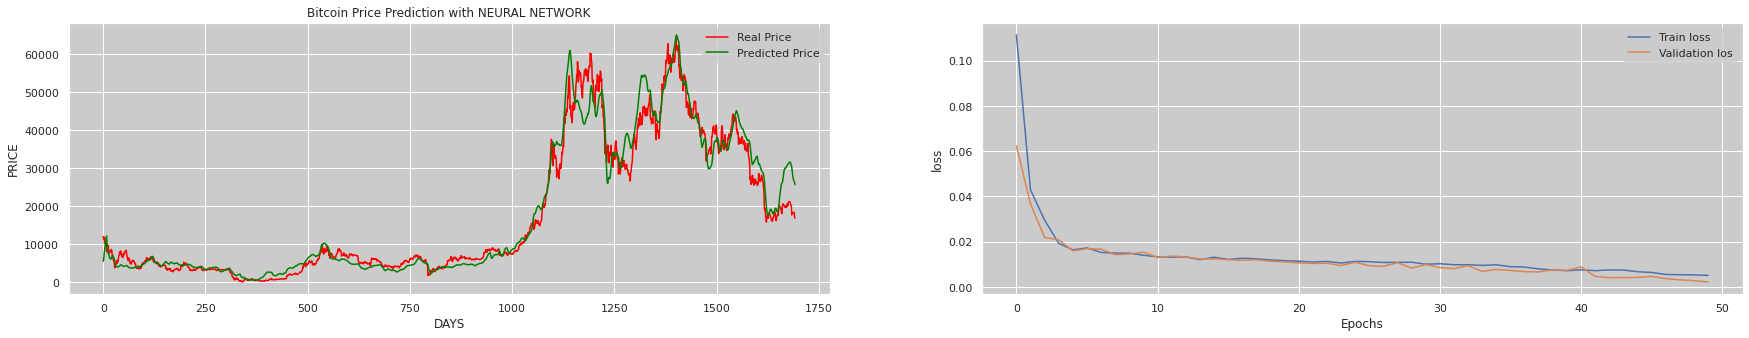

In [14]:
#@title **Red neuronal (RNN)** { display-mode: "form" }
plt.rcParams['axes.facecolor'] = 'cbcbcb'
plt.figure(figsize=(30,5))

plt.subplot(1, 2, 1)
plt.plot(Y_val, color = 'red', label = 'Real Price')
plt.plot(prediction, color = 'green', label = 'Predicted Price')
plt.title('Bitcoin Price Prediction with NEURAL NETWORK')
plt.xlabel('DAYS')
plt.ylabel('PRICE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation los')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()